In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
import re
import nltk
import sklearn as sk
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [3]:
os.chdir('/Users/reidhulsizer/Documents/')

In [4]:
os.getcwd()

'/Users/reidhulsizer/Documents'

In [5]:
train = pd.read_csv('sentimenttrain.csv', engine = 'python', header=None)

In [6]:
train.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [7]:
train.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
train.dtypes

0     int64
1     int64
2    object
3    object
4    object
5    object
dtype: object

In [9]:
train.columns = ['target', 'id', 'datetime', 'detail', 'user', 'text']

In [10]:
train.head()

,target,id,datetime,detail,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
train['datetime'][1]

'Mon Apr 06 22:19:49 PDT 2009'

In [12]:
pd.to_datetime(train['datetime'][1])

Timestamp('2009-04-06 22:19:49-0700', tz='pytz.FixedOffset(-420)')

In [13]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [14]:
train.dtypes

target                                       int64
id                                           int64
datetime    datetime64[ns, pytz.FixedOffset(-420)]
detail                                      object
user                                        object
text                                        object
dtype: object

In [15]:
train.target.unique()

array([0, 4])

In [16]:
train.detail.unique()

array(['NO_QUERY'], dtype=object)

In [17]:
del train['detail']

In [18]:
train.head()

,target,id,datetime,user,text
0,0,1467810369,2009-04-06 22:19:45-07:00,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49-07:00,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53-07:00,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57-07:00,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57-07:00,Karoli,"@nationwideclass no, it's not behaving at all...."


In [19]:
train.id.nunique()

1598315

In [20]:
train.user.nunique()

659775

In [21]:
train.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


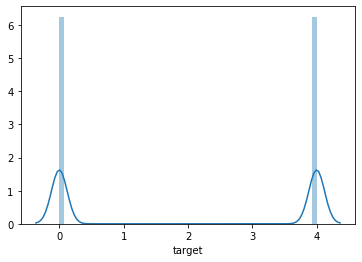

In [22]:
sns.distplot(train['target'])

In [23]:
np.max(train['datetime'])

Timestamp('2009-06-25 10:28:31-0700', tz='pytz.FixedOffset(-420)')

In [24]:
np.min(train['datetime'])

Timestamp('2009-04-06 22:19:45-0700', tz='pytz.FixedOffset(-420)')

In [25]:
train['date'] = pd.to_datetime(train['datetime']).dt.date

In [26]:
temp = pd.DataFrame(train.groupby('date')['target'].mean())

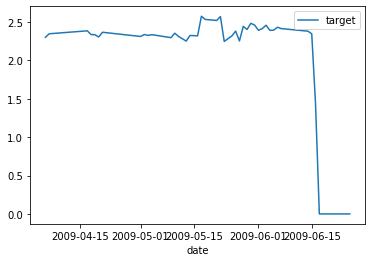

In [27]:
temp.plot()

In [28]:
temp = pd.DataFrame(train.groupby('date')['target'].count())

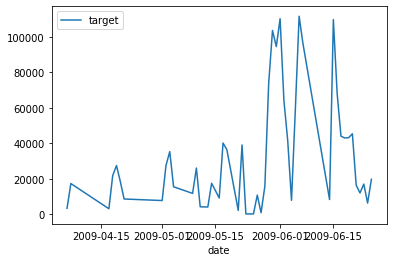

In [29]:
temp.plot()

In [30]:
temp = pd.DataFrame(train.groupby('date')['target'].mean())

In [31]:
temp.tail(40)

,target
date,
2009-05-02,2.338121
2009-05-03,2.326890
2009-05-04,2.336542
2009-05-09,2.297300
2009-05-10,2.355373
2009-05-11,2.313426
2009-05-13,2.252828
2009-05-14,2.325773
2009-05-16,2.321452


In [32]:
temp = pd.DataFrame(train.groupby('date')['target'].count())

In [33]:
temp.tail(40)

,target
date,
2009-05-02,27434
2009-05-03,35333
2009-05-04,15481
2009-05-09,11739
2009-05-10,26029
2009-05-11,4186
2009-05-13,4066
2009-05-14,17460
2009-05-16,9146


In [34]:
train = train[(train['datetime'] < '2009-06-16')]

In [35]:
train.head(1000)

,target,id,datetime,user,text,date
0,0,1467810369,2009-04-06 22:19:45-07:00,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06
1,0,1467810672,2009-04-06 22:19:49-07:00,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06
2,0,1467810917,2009-04-06 22:19:53-07:00,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06
3,0,1467811184,2009-04-06 22:19:57-07:00,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06
4,0,1467811193,2009-04-06 22:19:57-07:00,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06
...,...,...,...,...,...,...
995,0,1468055262,2009-04-06 23:28:39-07:00,LarryEisner,@dkoenigs thanks man. I'm so very grateful. ...,2009-04-06
996,0,1468055266,2009-04-06 23:28:41-07:00,ohmigosh_dusti,@t_wolfe i miss u too. i'm totally comin back...,2009-04-06
997,0,1468055472,2009-04-06 23:28:43-07:00,tiphaniebrooke,@sniffinglue ohhh. I love it. ps I'm sad we di...,2009-04-06
998,0,1468055604,2009-04-06 23:28:45-07:00,rinahannah,And somehow I still end up in this place,2009-04-06


In [36]:
del train['id']
del train['datetime']
del train['user']
del train['date']

In [37]:
train.head(5)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [38]:
train['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [39]:
def cleaner(a):
    a = re.sub('http\S+', 'urlzxy' ,a)
    a = re.sub('@\S+', 'mentionzxy' ,a)
    a = re.sub(';\S+', '' ,a)
    a = re.sub(':\S+', '' ,a)
    a = re.sub('[^a-zA-Z]',' ',a)
    a = re.sub('\s+', ' ', a)
    a = re.sub('\s+[a-zA-Z]\s+',' ', a)
    a = a.lower()
    
    return a

In [40]:
train['text'] = train['text'].apply(cleaner)

In [41]:
train['text'] = train['text'].apply(nltk.tokenize.word_tokenize)

In [43]:
max = np.max(train['text'].apply(len))

In [44]:
train['text']=train['text'].apply(lambda a: (a + max * [''])[:max])
train['text']=train['text'].apply(lambda a: a[:max])

In [82]:
train.loc[train['target'] == 4, 'target'] = 1

In [222]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(train['text'], train['target'], test_size= 1/5, random_state=42*42)
t = Tokenizer(num_words=max)
t.fit_on_texts(x_train)
x_train = t.texts_to_sequences(x_train)
x_test = t.texts_to_sequences(x_test)
x_train = t.sequences_to_matrix(x_train, mode='binary')
x_test = t.sequences_to_matrix(x_test, mode='binary')
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

model = Sequential()
model.add(Dense(2000, input_shape=(max,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 500
epochs = 2
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  validation_split=1/5)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Accuracy:', score[1])

Train on 822489 samples, validate on 205623 samples
Epoch 1/2
822489/822489 [==============================] - 19s 23us/step - loss: 0.6181 - accuracy: 0.6556 - val_loss: 0.6136 - val_accuracy: 0.6600
Epoch 2/2
257028/257028 [==============================] - 1s 4us/step
Accuracy: 0.6602548956871033


In [227]:
def SentimentClassifier(a):
    a = cleaner(a)
    a = nltk.tokenize.word_tokenize(a)
    a = (a + max * [''])[:max]
    a = a[:max]
    a = t.texts_to_sequences(a)
    a = t.sequences_to_matrix(a, mode='binary')
    a = model.predict(a)
    a = a[:,1]
    a = np.mean(np.append(a[(a < .50) | (a > .53)], [.5]))
    if a < 0.5: return 'Negative'
    elif a > 0.5: return 'Positive'
    else: return 'Neutral'
    
    

In [231]:
SentimentClassifier('why me')

'Negative'